# **Book Genre Prediction**

In [12]:
conda install -c conda-forge lightgbm


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - lightgbm


The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-3.3.5-py39hd77b12b_0 None


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
#Importing libraries.

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
#Using the pandas framework a dataset is created using the "BooksDataSet.csv" file.

books=pd.read_csv('./coding/with_ques/Amazon.csv')

#We only keep the 4 neccessary columns that we will be need. 
books=pd.DataFrame(books,columns=['problem_statement','title','tags','num_occur'])

In [4]:
books.head()

,problem_statement,title,tags,num_occur
0,Design a data structure that follows the const...,LRU Cache,Hash Table,117
1,Given an array of integers nums and an integer...,Two Sum,Array,117
2,Given an m x n 2D binary grid grid which repre...,Number of Islands,Array,103
3,Given an array of intervals where intervals[i]...,Merge Intervals,Array,87
4,You are given an array of strings products and...,Search Suggestions System,Array,68


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   problem_statement  526 non-null    object
 1   title              526 non-null    object
 2   tags               526 non-null    object
 3   num_occur          526 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 16.6+ KB


In [6]:
books.shape

(526, 4)

In [7]:
#Grouping all the rows by genre.
books.groupby('tags').count()

,problem_statement,title,num_occur
tags,,,
Array,266,266,266
Backtracking,2,2,2
Binary Search,3,3,3
Bit Manipulation,2,2,2
Depth-First Search,9,9,9
Design,1,1,1
Divide and Conquer,1,1,1
Dynamic Programming,9,9,9
Enumeration,1,1,1


In [8]:
books['problem_statement']


0      Design a data structure that follows the const...
1      Given an array of integers nums and an integer...
2      Given an m x n 2D binary grid grid which repre...
3      Given an array of intervals where intervals[i]...
4      You are given an array of strings products and...
                             ...                        
521    Given two integers left and right, return the ...
522    An integer has monotone increasing digits if a...
523    You are given an integer array nums. The adjac...
524    A complex number can be represented as a strin...
525    You are given an integer array nums of length ...
Name: problem_statement, Length: 526, dtype: object

In [9]:
# function for text cleaning
 
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

books.loc[:,'problem_statement']=books.loc[:,'problem_statement'].apply(lambda x: clean(x))

In [10]:
#Displaying "summary" after text-cleaning.
books['problem_statement']


0      design a data structure that follows the const...
1      given an array of integers nums and an integer...
2      given an m x n d binary grid grid which repres...
3      given an array of intervals where intervals i ...
4      you are given an array of strings products and...
                             ...                        
521    given two integers left and right return the c...
522    an integer has monotone increasing digits if a...
523    you are given an integer array nums the adjace...
524    a complex number can be represented as a strin...
525    you are given an integer array nums of length ...
Name: problem_statement, Length: 526, dtype: object

Graph to visualize the words and frequency in problem_statement.




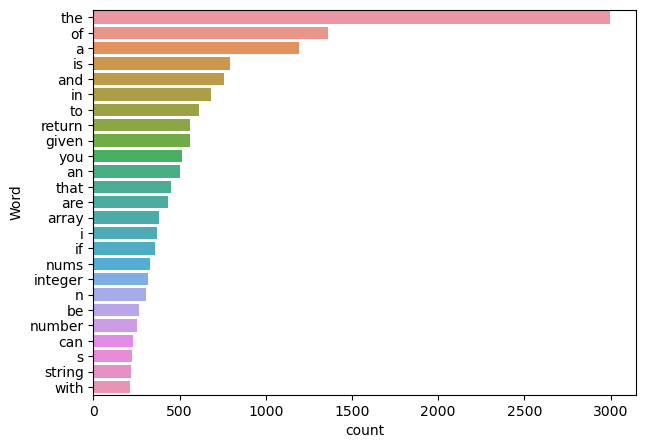

In [11]:
#Function to visualize the words and frequency in book's summary.

print("Graph to visualize the words and frequency in problem_statement.\n\n")

def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 25 most frequent words 
freqwords(books['problem_statement'], 25)

In [12]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['problem_statement'] = books['problem_statement'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['problem_statement'] = books['problem_statement'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['problem_statement'] = books['problem_statement'].apply(lambda x: stemming(x))

In [15]:
books['problem_statement']


0      design data structur follow constraint least r...
1      given array integ num integ target return inde...
2      given x n binari grid grid repres map land wat...
3      given array interv interv starti endi merg ove...
4      given array string product string searchword d...
                             ...                        
521    given two integ left right return count number...
522    integ monoton increas digit pair adjac digit x...
523    given integ array num adjac integ num perform ...
524    complex number repres string form real imagina...
525    given integ array num length n assum arrk arra...
Name: problem_statement, Length: 526, dtype: object

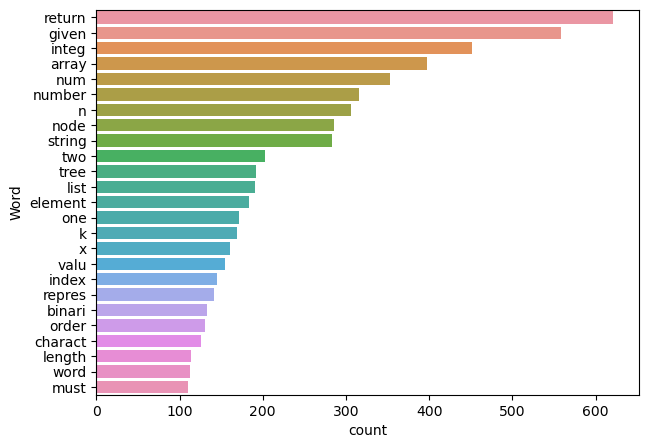

In [16]:
#Function to visualize the words and frequency in book's summary.

# print 25 most frequent words 
freqwords(books['problem_statement'], 25)

In [17]:
#Labeling each 'genre' with an unique number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['tags'])
print(y)

[10  0  0  0  0  0  0  0 10 11  0  0 14 10  0  0 11  0  0 14  4  0  0  0
  0  0  0 10  0  0  0  4 15 10 10 12 15 15 11 14  0  0  0  0 11  0  0 12
  0 10  0  0  0 13  0  0 10  0  0  7  0 11  0 10 10 15 14  0  0  0  0 12
 11  0  0 12  0  0  0  0  5  0 10 15 14  2 11  0  0  0  0  0 10 12 10  0
  0  0 12 14  0  0 15 11 11  0  0 10  0  0 15  0  0 10  0 10 14 12 12  0
  0 14 12  0 14 14 14 10 15 16  0  0 10 13  0 10  0  0  0 10 16 15 15  0
 14 14 12  0 11 14 10  0  0 12 10 16 10  0 11  0  0  0  0 12  0 15  7 14
 14  0 13  4 15 15  0 14  0 10 14  0  0  0 16  7  0  0 10  0 11 11 11  0
 12  0  0  0  0 12  0  0 10 11 12  0  0 16 14  0  0  0  0 12 15  2  0  0
  1 15 15 11  0  0  0  0 14 12  0 14  0  4  0  0 15 14  0  0 15  0  0  0
 15  0  0 14 10  2 15 12 12 12 15  0 10  0  0  0 16  0  0  4 11 10  0  0
  0 11  0 13 12  0  0 14 15 14 12 13  0  0  0 11  0  0  0  4  0  0  0  0
  7  0  0 12  8 12 15  0  0  7 14  0  0  0 10  4  0  0  0  0  7  0 15  0
  0 15  0  7 10 16 15  0 14 14 11 10 12 10 10  7  0

In [18]:
#perform inverse mapping on the unique numbers representing a genre.
le.inverse_transform([0,1,2,3,4,5])

array(['Array', 'Backtracking', 'Binary Search', 'Bit Manipulation',
       'Depth-First Search', 'Design'], dtype=object)

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(books['problem_statement'], y, test_size=0.2, random_state=234)


In [43]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(xtest.values.astype('U'))

In [44]:
svc = SVC(kernel='rbf',gamma=1)
svc.fit(xtrain_tfidf,ytrain)
svpred=svc.predict(xtest_tfidf)

print("Support Vector Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,svpred))
print ('Report : ')
print(classification_report(ytest,svpred))


Support Vector Classifier

Accuracy Score : 0.7358490566037735
Report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        11
          11       0.50      1.00      0.67         4
          12       0.80      0.67      0.73         6
          13       0.00      0.00      0.00         2
          14       0.56      0.69      0.62        13
          15       0.55      1.00      0.71         6
          16       0.00      0.00      0.00         2

    accuracy                           0.74       106
   macro avg       0.27      0.36      0.30       106
weighted avg       0.61      0.74      0.66       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(xtrain_tfidf,ytrain)
rfpred=rf.predict(xtest_tfidf)

print("Random Forest Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,rfpred))
print ('Report : ')
print(classification_report(ytest,rfpred))


Random Forest Classifier

Accuracy Score : 0.6981132075471698
Report : 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2
          10       0.00      0.00      0.00        11
          11       0.50      0.75      0.60         4
          12       0.44      0.67      0.53         6
          13       0.00      0.00      0.00         2
          14       0.70      0.54      0.61        13
          15       0.67      1.00      0.80         6
          16       0.00      0.00      0.00         2

    accuracy                           0.70       106
   macro avg       0.35      0.37      0.34       106
weighted avg       0.65      0.70      0.66       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(xtrain_tfidf,ytrain)
dtpred=dt.predict(xtest_tfidf)

print("Decision Tree Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,dtpred))
print ('Report : ')
print(classification_report(ytest,dtpred))


Decision Tree Classifier

Accuracy Score : 0.6698113207547169
Report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        57
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        11
          11       0.38      0.75      0.50         4
          12       0.50      0.67      0.57         6
          13       0.00      0.00      0.00         2
          14       0.67      0.62      0.64        13
          15       0.55      1.00      0.71         6
          16       0.00      0.00      0.00         2

    accuracy                           0.67       106
   macro avg       0.24      0.33      0.27       106
weighted avg       0.60      0.67      0.63       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
gvc = GradientBoostingClassifier()
gvc.fit(xtrain_tfidf,ytrain)
gvcpred=gvc.predict(xtest_tfidf)

print("Gradient Boosting Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,gvcpred))
print ('Report : ')
print(classification_report(ytest,gvcpred))


Gradient Boosting Classifier

Accuracy Score : 0.7264150943396226
Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        63
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          10       0.38      0.30      0.33        10
          11       0.50      1.00      0.67         3
          12       0.67      0.57      0.62         7
          13       0.00      0.00      0.00         0
          14       0.62      0.56      0.59         9
          15       0.64      1.00      0.78         7
          16       0.00      0.00      0.00         1

    accuracy                           0.73       106
   macro avg       0.28      0.33      0.30       106
weighted avg       0.71      0.73      0.71       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [47]:
lg = LGBMClassifier()
lg.fit(xtrain_tfidf,ytrain)
lgbpred=lg.predict(xtest_tfidf)

print("Naive Bayes Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,lgbpred))
print ('Report : ')
print(classification_report(ytest,lgbpred))


Naive Bayes Classifier

Accuracy Score : 0.6792452830188679
Report : 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        57
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2
          10       0.00      0.00      0.00        11
          11       0.40      0.50      0.44         4
          12       0.40      0.67      0.50         6
          13       0.00      0.00      0.00         2
          14       0.67      0.46      0.55        13
          15       0.67      1.00      0.80         6
          16       0.00      0.00      0.00         2

    accuracy                           0.68       106
   macro avg       0.33      0.34      0.32       106
weighted avg       0.63      0.68      0.64       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Among all models Support Vector Classifier model gives highest accuracy,so we make final prediction using this model.

## **Final Support Vector Regression model**

In [48]:
model = SVC(kernel='rbf',gamma=1)
model.fit(xtrain_tfidf,ytrain)
pred=model.predict(xtest_tfidf)

print(pred)
print('\nAccuracy Score :',accuracy_score(ytest,pred))
print ('Report : ')
conf_matrix = confusion_matrix(ytest, pred)
print(classification_report(ytest,pred))


[ 0  0  0  0  0  0  0  0 11  0  0  0  0  0 11 15  0 12  0  0  0 14  0  0
  0  0  0  0  0  0 15 14 11 14 15 15  0 14  0  0  0  0 14  0  0  0 15 14
 15 11 12 11 14  0  0  0 15 11  0  0 11  0 15  0  0  0  0 12  0  0 14 12
  0  0 14  0  0 14  0  0 15 14  0 14  0  0  0 14 11  0  0 14  0  0  0  0
  0  0 14  0 15 12  0 15  0 14]

Accuracy Score : 0.7358490566037735
Report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        11
          11       0.50      1.00      0.67         4
          12       0.80      0.67      0.73         6
          13       0.00      0.00      0.00         2
          14       0.56      0.69      0.62        13
          15       0.55      1.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
k = xtest.sample(1).index[0]
k

53

## Testing our Model by comparing Actual genre with Predicted genre

In [50]:
def process(q):
    q = clean(q)
    q = removestopwords(q)
    q = lematizing(q)
    q = stemming(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = model.predict(q_vec)
    return le.inverse_transform(q_pred)[0]

for i in range(50):
  k = xtest.sample(1).index[0]
  
  print("\nBook: ", books['title'][k] )
  print("\nPredicted genre: ", process(xtest[k]))
  print("\nActual genre: ",books['tags'][k], "\n")
  print("-------------------------------")



Book:  Maximum Number of Events That Can Be Attended

Predicted genre:  Array

Actual genre:  Array 

-------------------------------

Book:  Copy List with Random Pointer

Predicted genre:  Linked List

Actual genre:  Hash Table 

-------------------------------

Book:  Combination Sum

Predicted genre:  Array

Actual genre:  Array 

-------------------------------

Book:  Champagne Tower

Predicted genre:  Array

Actual genre:  Dynamic Programming 

-------------------------------

Book:  Stone Game

Predicted genre:  Array

Actual genre:  Array 

-------------------------------

Book:  H-Index

Predicted genre:  Array

Actual genre:  Array 

-------------------------------

Book:  Matrix Block Sum

Predicted genre:  Array

Actual genre:  Array 

-------------------------------

Book:  Binary Tree Zigzag Level Order Traversal

Predicted genre:  Tree

Actual genre:  Tree 

-------------------------------

Book:  Reverse Linked List II

Predicted genre:  Linked List

Actual genre:  Li

In [7]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [10]:
conda list


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - lighgtgbm

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.10                  py39_0  
anaconda-client           1.11.0           py39haa95532_0  
anaconda-navigator        2.4.0            py39haa95532_0  
anaconda-project          0.11.1           py39haa95532_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.11.7           py39haa95532_0  
astropy                   5.1              py39h080aedc_0  
atomicwrites              1.4.0                      py_0  
attrs                     21.4.0    

In [9]:
conda install -c conda-forge lighgtgbm


^C

Note: you may need to restart the kernel to use updated packages.
